In [6]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
url = 'https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv'
papers = pd.read_csv(url)
# Print head
papers.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [7]:
# Load the regular expression library
import re
# Rimuovi la punteggiatura
papers['TweetText_processed'] = papers['TweetText'].map(lambda x: re.sub(r'[,.!?]', '', x))

# Converti i testi in minuscolo
papers['TweetText_processed'] = papers['TweetText_processed'].map(lambda x: x.lower())

# Visualizza le prime righe
papers['TweetText_processed'].head()

0    now all @apple has to do is get swype on the i...
1    @apple will be adding more carrier support to ...
2    hilarious @youtube video - guy does a duet wit...
3    @rim you made it too easy for me to switch to ...
4    i just realized that the reason i got into twi...
Name: TweetText_processed, dtype: object

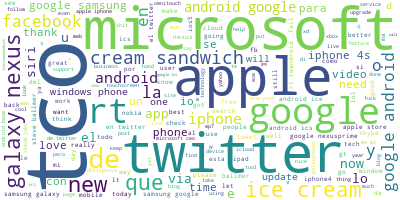

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['TweetText_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk

# Scarica le stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Definisci le stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Funzione per convertire le frasi in parole
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Funzione per rimuovere le stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# Accedi correttamente alla colonna
data = papers['TweetText_processed'].values.tolist()
data_words = list(sent_to_words(data))

# Rimuovi le stopwords
data_words = remove_stopwords(data_words)

# Visualizza i primi 30 termini del primo documento
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hongyuxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['apple', 'get', 'swype', 'iphone', 'crack', 'iphone']


In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)]


In [11]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"http" + 0.027*"tco" + 0.026*"google" + 0.025*"apple" + '
  '0.021*"microsoft" + 0.013*"twitter" + 0.012*"android" + 0.007*"rt" + '
  '0.006*"que" + 0.006*"de"'),
 (1,
  '0.023*"microsoft" + 0.021*"apple" + 0.015*"google" + 0.014*"http" + '
  '0.014*"tco" + 0.013*"twitter" + 0.008*"rt" + 0.007*"android" + '
  '0.005*"windows" + 0.005*"nexus"'),
 (2,
  '0.043*"tco" + 0.043*"http" + 0.028*"apple" + 0.027*"google" + '
  '0.017*"twitter" + 0.016*"microsoft" + 0.013*"android" + 0.011*"rt" + '
  '0.008*"de" + 0.006*"nexus"'),
 (3,
  '0.061*"twitter" + 0.015*"microsoft" + 0.013*"http" + 0.013*"tco" + '
  '0.010*"rt" + 0.009*"en" + 0.009*"apple" + 0.008*"de" + 0.007*"facebook" + '
  '0.006*"google"'),
 (4,
  '0.032*"twitter" + 0.027*"apple" + 0.022*"tco" + 0.021*"http" + '
  '0.013*"google" + 0.009*"rt" + 0.009*"microsoft" + 0.007*"new" + '
  '0.007*"iphone" + 0.005*"de"'),
 (5,
  '0.027*"twitter" + 0.018*"tco" + 0.018*"http" + 0.014*"google" + 0.013*"rt" '
  '+ 0.012*"apple" + 0

In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Importa il modulo corretto

# Abilita la visualizzazione in notebook
pyLDAvis.enable_notebook()

# Prepara i dati per la visualizzazione
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Visualizza i dati preparati
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.032463 -0.037275       1        1  17.001221
9      0.054516 -0.048227       2        1  14.179542
7      0.095277  0.037430       3        1  13.500686
0      0.020073 -0.017541       4        1   9.816861
6     -0.012394  0.120157       5        1   9.046406
4     -0.057954 -0.063262       6        1   8.881048
3     -0.137104  0.027904       7        1   8.788773
8      0.062363  0.013659       8        1   6.987609
1     -0.017096  0.004485       9        1   5.927737
5     -0.040144 -0.037330      10        1   5.870117, topic_info=           Term         Freq        Total Category  logprob  loglift
34      twitter  1123.000000  1123.000000  Default  30.0000  30.0000
1663  microsoft  1264.000000  1264.000000  Default  29.0000  29.0000
0         apple  1059.000000  1059.000000  Default  28.0000  28.0000
35      android   585.000000   585.000000  Default  27.0000  27.0000
1637     google  1297.000000  1297.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1663  microsoft    22.430152  1264.081403  Topic10  -5.0345  -1.1964
2812         el    10.176471   162.722390  Topic10  -5.8249   0.0633
167         new    11.322968   236.276949  Topic10  -5.7181  -0.2029
1110    samsung     9.522424   239.938211  Topic10  -5.8913  -0.3914
1445      nexus     7.391163   256.678490  Topic10  -6.1446  -0.7122

[802 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
5673       4  0.873025    abstract
12340      1  0.208416        aday
12340      6  0.277889        aday
12340      7  0.416833        aday
12340      8  0.069472        aday
...      ...       ...         ...
11225      5  0.840048      zoeken
10039      3  0.774036       zqcgx
2702       2  0.825666        zqny
5672       3  0.774328  zuckerberg
6644       8  0.770863         для

[1866 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 1, 7, 5, 4, 9, 2, 6])